In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import f1_score


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer


In [2]:
## FUN


def cross_validation(X,y,model):
    f1 = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_macro = f1_score(y_test, y_pred, average = 'macro')
        f1.append(f1_macro)
    return f1


In [16]:
def load_data(dir_data):
    data = pd.read_csv(dir)
    data = data.iloc[:,2:]
    return data
    

## dropna

### naive drop

In [3]:
train = pd.read_csv('../data/preprocess/train_t1.csv')
test = pd.read_csv('../data/preprocess/test1.csv')

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_62529/390627105.py:1: DtypeWarning: Columns (6,7,8,9,11,12,13,14,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/preprocess/train_t1.csv')


In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722815 entries, 0 to 722814
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0.1                    722815 non-null  int64  
 1   Unnamed: 0                      722815 non-null  int64  
 2   floors_before_eq (total)        390009 non-null  float64
 3   old_building                    483611 non-null  float64
 4   plinth_area (ft^2)              301607 non-null  float64
 5   height_before_eq (ft)           390009 non-null  float64
 6   land_surface_condition          421209 non-null  object 
 7   type_of_foundation              483611 non-null  object 
 8   type_of_roof                    301607 non-null  object 
 9   type_of_ground_floor            390009 non-null  object 
 10  type_of_other_floor             722815 non-null  object 
 11  position                        410809 non-null  object 
 12  building_plan_co

(None, None)

In [5]:
train = train.iloc[:,2:]
test = test.iloc[:,2:]

In [6]:
train = train.copy().drop(labels='technical_solution_proposed',axis=1)

In [7]:
train = train.copy().dropna()

In [8]:
train.shape[0]

301607

In [9]:
from sklearn.tree import DecisionTreeClassifier
from catboost.utils import eval_metric
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import f1_score

X = train.iloc[:,:-1]
y = train.iloc[:,-1]
cat_features = X .select_dtypes(include='object').columns.tolist()
one_hot_encoded = pd.get_dummies(X[cat_features])
cols_var = [i for i in X if i not in cat_features]
df_encoded = pd.concat([X.loc[:,cols_var], one_hot_encoded], axis=1)


# Set up the StratifiedKFold for cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeClassifier()
f1 = cross_validation(df_encoded, y,dt)
f1


[0.31957175718186004,
 0.31954539564297885,
 0.31852149643801403,
 0.31913289604828815,
 0.3184693494250852]

## fillna

### naive fill

In [10]:
train_fill = pd.read_csv('../data/preprocess/train_t1.csv')
train_fill = train_fill.iloc[:,2:]
X = train_fill.iloc[:,:-1]
y = train_fill.iloc[:,-1]
cat_features = X .select_dtypes(include='object').columns.tolist()
one_hot_encoded = pd.get_dummies(X[cat_features])
df_encoded = pd.concat([X.loc[:,cols_var], one_hot_encoded], axis=1)
df_encoded = df_encoded.copy().dropna(axis=0)
# Set up the StratifiedKFold for cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeClassifier()
f1 = cross_validation(df_encoded, y.iloc[df_encoded.index],dt)
f1

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_62529/3795278590.py:1: DtypeWarning: Columns (6,7,8,9,11,12,13,14,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  train_fill = pd.read_csv('../data/preprocess/train_t1.csv')


[0.35896088217166844,
 0.36054246335054396,
 0.3576543569459134,
 0.3595852805395202,
 0.35767838788102396]

In [11]:
df_encoded.isna().sum()

floors_before_eq (total)                      0
old_building                                  0
plinth_area (ft^2)                            0
height_before_eq (ft)                         0
has_secondary_use                             0
                                             ..
govermental_use_type_Govermental Buildings    0
govermental_use_type_Non-govermental          0
govermental_use_type_Police Offices           0
flexible_superstructure_available             0
flexible_superstructure_unavailable           0
Length: 108, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


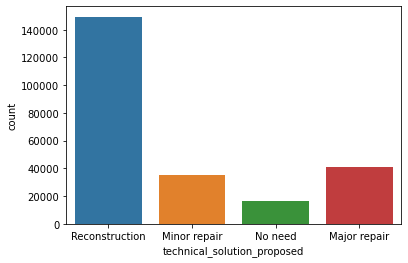

In [12]:
sns.countplot(test['technical_solution_proposed'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


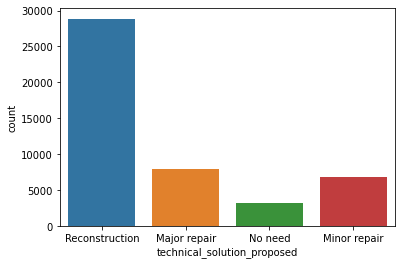

In [14]:
sns.countplot(train_fill['technical_solution_proposed'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


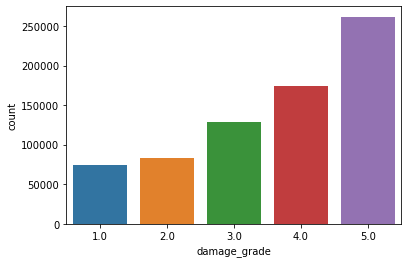

In [15]:
sns.countplot(train_fill['damage_grade'])

### KNN inputer

In [42]:
data = pd.read_csv('../data/preprocess/train_t1.csv')
test = pd.read_csv('../data/preprocess/test1.csv')
data = data.iloc[:,2:]
test = test.iloc[:,2:]


/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_62529/126058878.py:1: DtypeWarning: Columns (6,7,8,9,11,12,13,14,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/preprocess/train_t1.csv')


In [43]:
data = data.drop('technical_solution_proposed',axis=1)
data = data.dropna(thresh=15)

print(data.shape)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

### train
cat_features = X .select_dtypes(include='object').columns.tolist()
one_hot_encoded = pd.get_dummies(X[cat_features])
cols_var = [i for i in X.columns if i not in cat_features]
tmp = (X[cols_var]-X[cols_var].mean())/X[cols_var].std()
tmp = pd.concat([tmp,X[cat_features]],axis=1)

tmp = tmp.apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))
print(tmp.isna().sum())
imputer = KNNImputer(n_neighbors=1)
tmp = imputer.fit_transform(tmp)

df = pd.DataFrame(tmp,columns=X.columns)
cross_validation(df,y,dt)

(431609, 23)
floors_before_eq (total)           41600
old_building                           0
plinth_area (ft^2)                130002
height_before_eq (ft)              41600
has_secondary_use                      0
type_of_reinforcement_concrete         0
no_family_residing                     0
wall_binding                           0
wall_material                          0
land_surface_condition             10400
type_of_foundation                     0
type_of_roof                      130002
type_of_ground_floor               41600
type_of_other_floor                    0
position                           20800
building_plan_configuration        10400
legal_ownership_status                 0
residential_type                       0
public_place_type                      0
industrial_use_type                    0
govermental_use_type                   0
flexible_superstructure                0
dtype: int64


AttributeError: 'numpy.ndarray' object has no attribute 'isna'

[0.4022026128603568,
 0.40624909172144347,
 0.4050234762873126,
 0.4047708788245491,
 0.4031387777422581]

knn inputer actually has significant output